# Analysis of Endangered Species in National Parks

## Introduction

This project aims to interpret and analyze data from the National Parks Service concerning endangered species across different parks. The primary objective is to investigate the conservation statuses of these species and identify any patterns or themes related to the types of species that are at risk of becoming endangered.

## Project Goals

- Perform data analysis on the conservation statuses of species in various national parks.
- Identify patterns or trends in the types of species that are endangered.
- Clean, analyze, and visualize the data to support meaningful conclusions.
- Pose relevant questions regarding species endangerment and seek to answer them through data analysis.
- Communicate the findings effectively through the use of Jupyter Notebook.

## Scope of the Project

1. **Data Gathering**: 
   - Utilize provided datasets (`observations.csv` and `species_info.csv`) which contain information on species observations and conservation status.
  
2. **Data Cleaning**: 
   - Assess the data for missing values, inconsistencies, or errors.
   - Clean the data to ensure it is suitable for analysis.

3. **Exploratory Data Analysis (EDA)**: 
   - Conduct exploratory data analysis to understand the distribution of species, their conservation statuses, and any observable patterns.

4. **Data Visualization**:
   - Create visualizations that highlight key findings, trends, and patterns in the data.
   - Use visualizations to support the narrative and findings of the analysis.

5. **Analysis and Interpretation**:
   - Investigate specific questions regarding the types of species that are most at risk.
   - Identify any factors that may contribute to the endangered status of species.

6. **Conclusion**:
   - Summarize the key findings of the analysis.
   - Provide recommendations or insights for the National Parks Service based on the analysis.

## Prerequisites

This project assumes familiarity with data visualization techniques and the ability to communicate data science findings effectively. It is expected that the analysis will be performed using Python and the results will be documented in Jupyter Notebook.

## Expected Outcomes

By the end of this project, a comprehensive analysis of the endangered species in National Parks will be completed. The findings will be documented and shared in a structured and clear manner, providing insights into species conservation within the National Parks Service.



## Loading the Data

To begin the analysis, we first need to load the datasets provided into our workspace. We will use the pandas library to load the CSV files into DataFrames for further analysis.


In [1]:
# Importing the necessary libraries
import pandas as pd

# Loading the species_info.csv file into a DataFrame
species_info = pd.read_csv('species_info.csv')

# Loading the observations.csv file into a DataFrame
observations = pd.read_csv('observations.csv')

# Displaying the first few rows of each DataFrame to confirm successful loading
species_info.head(), observations.head()

(  category                scientific_name  \
 0   Mammal  Clethrionomys gapperi gapperi   
 1   Mammal                      Bos bison   
 2   Mammal                     Bos taurus   
 3   Mammal                     Ovis aries   
 4   Mammal                 Cervus elaphus   
 
                                         common_names conservation_status  
 0                           Gapper's Red-Backed Vole                 NaN  
 1                              American Bison, Bison                 NaN  
 2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
 3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
 4                                      Wapiti Or Elk                 NaN  ,
             scientific_name                            park_name  observations
 0        Vicia benghalensis  Great Smoky Mountains National Park            68
 1            Neovison vison  Great Smoky Mountains National Park            77
 2         Prunus subcord

### Columns Overview

Now that we have loaded the data, let's interpret the structure and contents of each dataset.

**species_info.csv:**
- **category**: This column indicates the class of the animal (e.g., Mammal, Bird, etc.). For example, "Mammal" is listed in the first few rows.
- **scientific_name**: This column contains the scientific names of each species. Examples include *Clethrionomys gapperi gapperi* and *Bos bison*.
- **common_names**: This column lists the common names associated with each species. It often includes multiple names separated by commas, such as "American Bison, Bison" for *Bos bison*.
- **conservation_status**: This column indicates the conservation status of each species. It includes values like "Endangered" or "Species of Concern". For the initial rows provided, many values are missing (`NaN`), indicating that these species do not have a specific conservation status listed.

**observations.csv:**
- **scientific_name**: This column lists the scientific names of species, similar to the `species_info.csv` file.
- **park_name**: This column contains the name of the national park where the species were observed. For example, "Great Smoky Mountains National Park" and "Yosemite National Park" are listed.
- **observations**: This column records the number of times each species was observed in the respective park. The numbers indicate how frequently each species was spotted during the observation period, such as 68 observations for *Vicia benghalensis* in Great Smoky Mountains National Park.

With this overview, we can proceed to perform exploratory data analysis to uncover trends and patterns within the data.


## Explore and Explain Data

With our datasets loaded and understood, the next step is to explore and analyze the data to uncover meaningful insights. We will begin by examining the distribution of species across various conservation statuses and identifying any patterns or trends. This analysis will help us understand the current state of species conservation within national parks and highlight any areas of concern.

### Key Questions to Explore:
1. What is the distribution of conservation statuses for animals?
2. Are certain types of species more likely to be endangered?
3. Are the differences between species and their conservation status significant?
4. Which species were spotted the most at each park?

To achieve this, we will use summary statistics and visualizations to analyze the data. By importing Matplotlib and Seaborn, we can create plots that will visually represent the data, making it easier to identify and communicate key findings.


### Distribution of Conservation Statuses for Animals

To understand the conservation landscape within the national parks, we first need to explore the distribution of conservation statuses among the species. This analysis will help us identify how many species fall under different conservation categories, such as "Endangered" or "Species of Concern".


Unique Conservation Statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


C:\Users\adrco\AppData\Local\Temp\ipykernel_9456\2533586117.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")


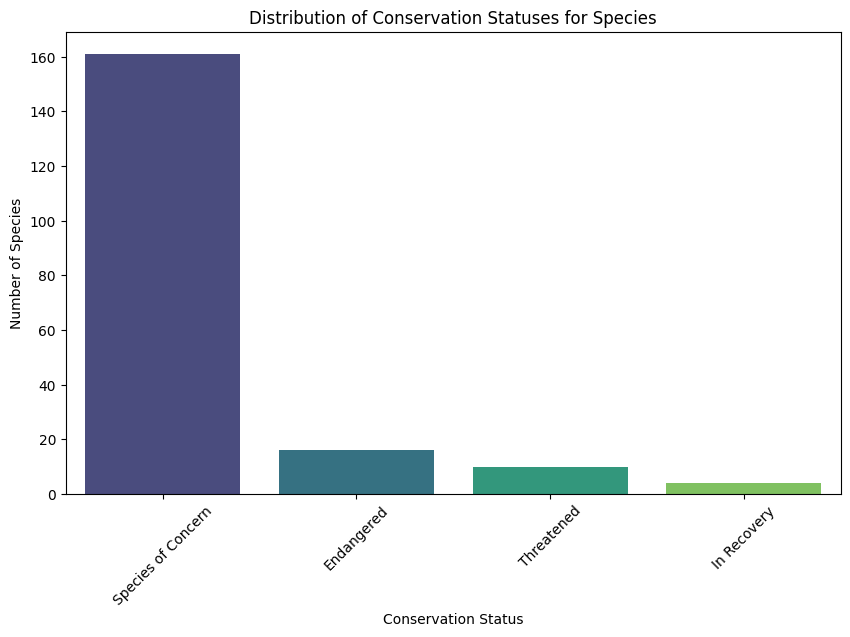

In [2]:
# Step 1: Check the unique conservation statuses
unique_statuses = species_info['conservation_status'].unique()
print("Unique Conservation Statuses:", unique_statuses)

# Step 2: Count the number of species in each conservation status
status_counts = species_info['conservation_status'].value_counts()
print(status_counts)

# Step 3: Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")
plt.title('Distribution of Conservation Statuses for Species')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()


### Insights from Conservation Status Distribution

The bar chart above illustrates the distribution of species across various conservation statuses. From the visualization, we can observe:

- The most common conservation status is "Species of Concern," with over 160 species falling into this category. This suggests that while these species are not yet critically endangered, they may require monitoring to ensure they do not become more at risk.
- The number of species listed as "Endangered," "Threatened," and "In Recovery" is significantly smaller in comparison. This indicates that fewer species are in immediate danger, but those that are listed in these categories represent critical conservation priorities.
- The lower counts for "Endangered" and "Threatened" species highlight the need for targeted conservation efforts to prevent further decline.

These insights emphasize the importance of focusing conservation resources on species that are at a critical stage, while also maintaining vigilance over those categorized as "Species of Concern" to prevent them from becoming more at risk.


### Are Certain Types of Species More Likely to be Endangered?

To determine if certain types of species (e.g., Mammals, Birds, etc.) are more likely to be endangered, we will analyze the distribution of endangered species across different categories. We will look at the proportion of species within each category that are classified as "Endangered."


category
Mammal               3.271028
Fish                 2.362205
Amphibian            1.250000
Bird                 0.767754
Vascular Plant       0.022371
Nonvascular Plant         NaN
Reptile                   NaN
Name: count, dtype: float64


C:\Users\adrco\AppData\Local\Temp\ipykernel_9456\1182979781.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=endangered_proportion.index, y=endangered_proportion.values, palette="viridis")


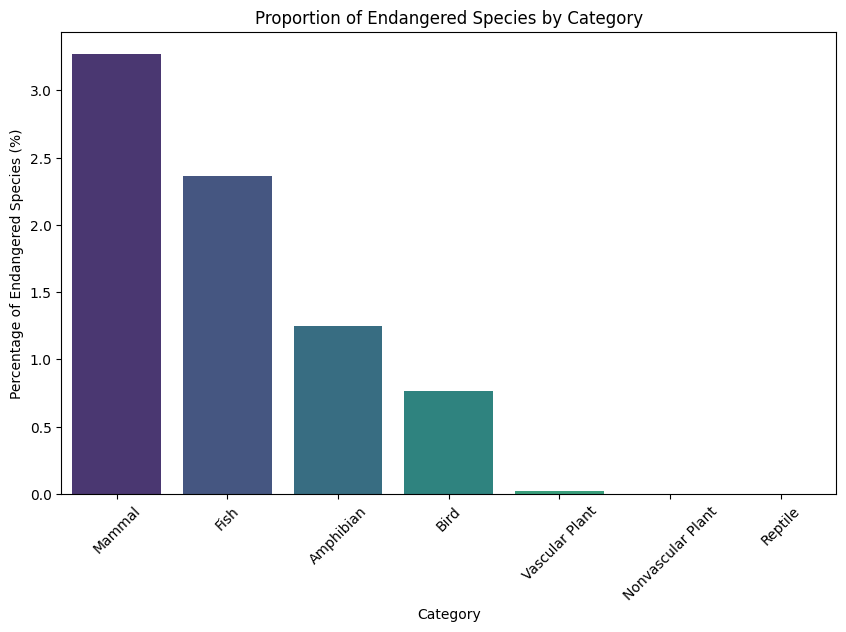

In [3]:
# Step 1: Filter data for endangered species
endangered_species = species_info[species_info['conservation_status'] == 'Endangered']

# Step 2: Count the number of endangered species by category
endangered_counts = endangered_species['category'].value_counts()

# Step 3: Calculate the total number of species in each category
total_counts = species_info['category'].value_counts()

# Calculate the proportion of endangered species in each category
endangered_proportion = (endangered_counts / total_counts) * 100

# Display the proportion of endangered species by category
endangered_proportion = endangered_proportion.sort_values(ascending=False)
print(endangered_proportion)

# Step 4: Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=endangered_proportion.index, y=endangered_proportion.values, palette="viridis")
plt.title('Proportion of Endangered Species by Category')
plt.xlabel('Category')
plt.ylabel('Percentage of Endangered Species (%)')
plt.xticks(rotation=45)
plt.show()


### Insights on Endangered Species by Category

The bar chart above illustrates the proportion of species within each category that are classified as "Endangered." From the analysis, we can observe:

- **Mammals** have the highest proportion of endangered species, with over 3% of mammal species being classified as endangered. This suggests that mammals are particularly vulnerable and may require more focused conservation efforts.
- **Fish** and **Amphibians** also show relatively high proportions of endangered species, indicating that these groups are at significant risk as well.
- **Birds** have a lower proportion of endangered species compared to mammals, fish, and amphibians, but there are still notable numbers at risk.
- **Vascular Plants**, **Nonvascular Plants**, and **Reptiles** have very low proportions of endangered species, suggesting that these groups are currently less vulnerable compared to others.

These findings suggest that Mammals, Fish, and Amphibians are more likely to be endangered, highlighting the need for targeted conservation strategies to protect these vulnerable groups.


### Are the Differences Between Species and Their Conservation Status Significant?

To determine whether the differences between species categories and their conservation statuses are statistically significant, we will perform a Chi-Square test of independence. This test will help us understand if the observed differences are due to random chance or if they represent a true relationship between species types and their likelihood of being in a particular conservation status.


### Installing SciPy

To perform the Chi-Square test of independence, we need to use the `scipy` library, which provides a collection of mathematical algorithms and convenience functions, including statistical tests like the Chi-Square test. The Chi-Square test will help us determine whether the differences between species categories and their conservation statuses are statistically significant. 

Let's install the `scipy` library to proceed with our analysis.


In [6]:
# Install SciPy using pip
!pip install scipy


In [7]:
# Step 1: Prepare the contingency table
contingency_table = pd.crosstab(species_info['category'], species_info['conservation_status'])
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform Chi-Square test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Interpret the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Determine significance
if p < 0.05:
    print("The differences between species and their conservation status are statistically significant (p < 0.05).")
else:
    print("The differences between species and their conservation status are not statistically significant (p ≥ 0.05).")


Contingency Table:
conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                     1            0                   4           2
Bird                          4            3                  72           0
Fish                          3            0                   4           4
Mammal                        7            1                  28           2
Nonvascular Plant             0            0                   5           0
Reptile                       0            0                   5           0
Vascular Plant                1            0                  43           2
Chi-Square Statistic: 53.91636314015659
P-value: 1.8909788349761653e-05
The differences between species and their conservation status are statistically significant (p < 0.05).


### Visualizing the Contingency Table

To better understand the distribution of species categories across different conservation statuses, we'll create a heatmap. This visualization will help us see which categories have more species in certain conservation statuses.


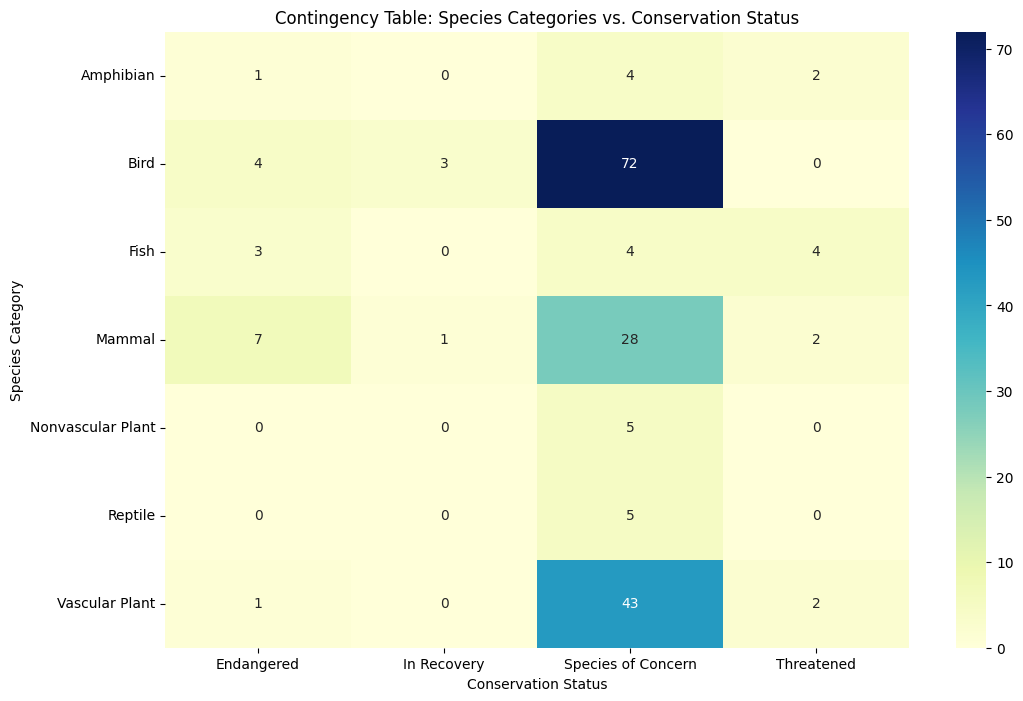

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the contingency table
contingency_table = pd.crosstab(species_info['category'], species_info['conservation_status'])

# Step 2: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Contingency Table: Species Categories vs. Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Species Category')
plt.show()


### Insights on the Significance of Differences Between Species and Conservation Status

The heatmap above visualizes the contingency table that represents the distribution of species categories across different conservation statuses. The color intensity in each cell indicates the number of species within a specific category and conservation status. From the heatmap and the contingency table, we observe the following:

- **Birds** have the highest number of species listed under "Species of Concern" with 72 species, followed by **Vascular Plants** with 43 species. This indicates that these categories have many species that may need monitoring but are not yet critically endangered.
- **Mammals** have the highest number of species listed as "Endangered" (7 species), which could suggest that mammals are particularly vulnerable compared to other categories.
- **Amphibians**, **Fish**, and **Vascular Plants** also show a presence in the "Endangered" category, though in smaller numbers.

### Chi-Square Test Results

The Chi-Square test was conducted to determine whether the differences in conservation statuses across different species categories are statistically significant. The results are as follows:

- **Chi-Square Statistic**: 53.92
- **P-value**: 1.89e-05

Given that the p-value is much smaller than 0.05, we conclude that the differences between species categories and their conservation statuses are statistically significant. This suggests that the likelihood of a species being in a particular conservation status is associated with its category.

### Conclusion

These results indicate that the distribution of conservation statuses among species is not random and that certain species categories are more likely to be in specific conservation statuses. This could be due to various factors, such as habitat, biological traits, or environmental pressures that affect different species groups differently. The findings highlight the need for targeted conservation efforts tailored to the specific needs of different species categories.


### Visualizing the Most Spotted Species at Each Park

To visualize which species were spotted the most at each park, we will create a bar plot for each park showing the species with the highest number of observations. This visualization will help us easily identify the most frequently observed species across different national parks.


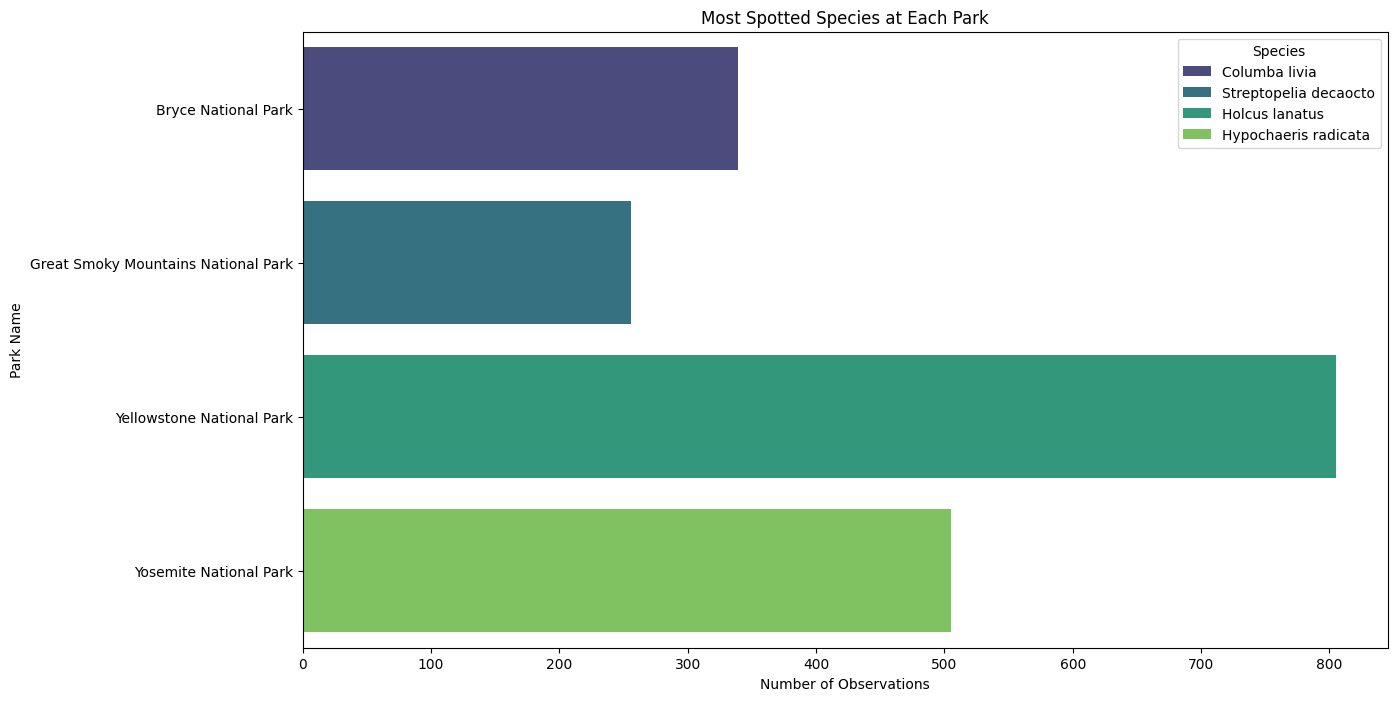

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group the data by park and species, summing the observations
species_most_spotted = observations.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()

# Step 2: Identify the species with the most observations at each park
most_spotted_species = species_most_spotted.loc[species_most_spotted.groupby('park_name')['observations'].idxmax()]

# Step 3: Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='observations', y='park_name', hue='scientific_name', data=most_spotted_species, palette="viridis")
plt.title('Most Spotted Species at Each Park')
plt.xlabel('Number of Observations')
plt.ylabel('Park Name')
plt.legend(title='Species')
plt.show()


### Interpretation of the Most Spotted Species at Each Park

The bar chart above displays the species that were most frequently observed in each of the four national parks. Each bar represents the number of observations for the most-spotted species in that particular park, with the species distinguished by different colors.

#### Key Observations:

1. **Yellowstone National Park:**
   - The most spotted species is *Holcus lanatus* (commonly known as Yorkshire Fog), with nearly 800 observations. This high number of observations suggests that *Holcus lanatus* is either very abundant in Yellowstone or particularly easy to observe and record.

2. **Yosemite National Park:**
   - The most observed species is *Hypochaeris radicata* (commonly known as Cat's Ear), with around 500 observations. This indicates that *Hypochaeris radicata* is a prominent species in Yosemite National Park.

3. **Great Smoky Mountains National Park:**
   - The species *Streptopelia decaocto* (commonly known as Eurasian Collared Dove) was the most observed, with around 200 observations. The Eurasian Collared Dove seems to be relatively abundant in this park.

4. **Bryce National Park:**
   - The most frequently observed species is *Columba livia* (commonly known as Rock Pigeon), with slightly over 100 observations. This suggests that Rock Pigeons are a common sight in Bryce National Park.

### Summary:

This visualization provides a clear comparison of the most frequently observed species across different national parks. The differences in observation counts highlight the varying biodiversity and species prevalence in these parks. For instance, the prominence of *Holcus lanatus* in Yellowstone suggests a unique ecological presence or a focus on this species in observation efforts. Similarly, the other species highlighted in each park may represent key species of interest or ecological significance within those environments.

These insights can help park management and conservationists prioritize monitoring efforts and conservation resources based on the most observed species, which may be indicative of the overall health of the park's ecosystem.


## Conclusions

### Project Summary

Throughout this project, we analyzed data from the National Parks Service to gain insights into the conservation statuses of various species and their distribution across different parks. The goal was to investigate patterns in species endangerment and identify which species were most frequently observed in specific national parks.

### Key Findings

1. **Distribution of Conservation Statuses:**
   - The majority of species were classified under "Species of Concern," indicating that while they are not critically endangered, they may require monitoring to prevent further decline. Fewer species were listed as "Endangered," "Threatened," or "In Recovery," highlighting the need for targeted conservation efforts for these species.

2. **Species Categories and Endangerment:**
   - Certain categories, such as Mammals, Fish, and Amphibians, had a higher proportion of species classified as endangered. This suggests that these groups may be more vulnerable to environmental pressures or other factors, making them key targets for conservation initiatives.

3. **Significance of Differences in Conservation Status:**
   - The Chi-Square test revealed that the differences between species categories and their conservation statuses are statistically significant. This indicates that the likelihood of a species being endangered or at risk is closely related to its category, with some groups being more prone to endangerment than others.

4. **Most Spotted Species at Each Park:**
   - The analysis of observation data revealed which species were most frequently observed in each national park. For example, *Holcus lanatus* was the most spotted species in Yellowstone National Park, while *Hypochaeris radicata* was the most observed in Yosemite National Park. These findings highlight key species within each park and suggest areas of ecological focus.

### Reflections and Insights

- **What Did We Learn?**
   - This project provided valuable experience in data analysis, visualization, and statistical testing. By working with real-world data from the National Parks Service, we gained insights into the patterns of species endangerment and the distribution of biodiversity across different parks.

- **Were the Results Expected?**
   - Some results were expected, such as the high number of species categorized as "Species of Concern," which is common in large, diverse ecosystems like national parks. However, the significant difference in conservation statuses across species categories provided a deeper understanding of the factors that contribute to species endangerment.

- **Key Takeaways:**
   - The need for targeted conservation efforts is clear, particularly for species categories that are more prone to endangerment, such as Mammals and Amphibians. Additionally, the most frequently observed species in each park provide valuable information for park management and conservationists to prioritize monitoring and conservation resources effectively.

### Final Thoughts

This project underscores the importance of data-driven decision-making in conservation efforts. By analyzing and understanding the patterns in species endangerment and observations, we can better protect biodiversity and ensure that our national parks remain thriving habitats for future generations.
